In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
df = pd.read_csv('sdn_dataset.csv')

In [3]:
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [4]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 23 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

Distribution of Missing Values in the Dataset

<AxesSubplot: >

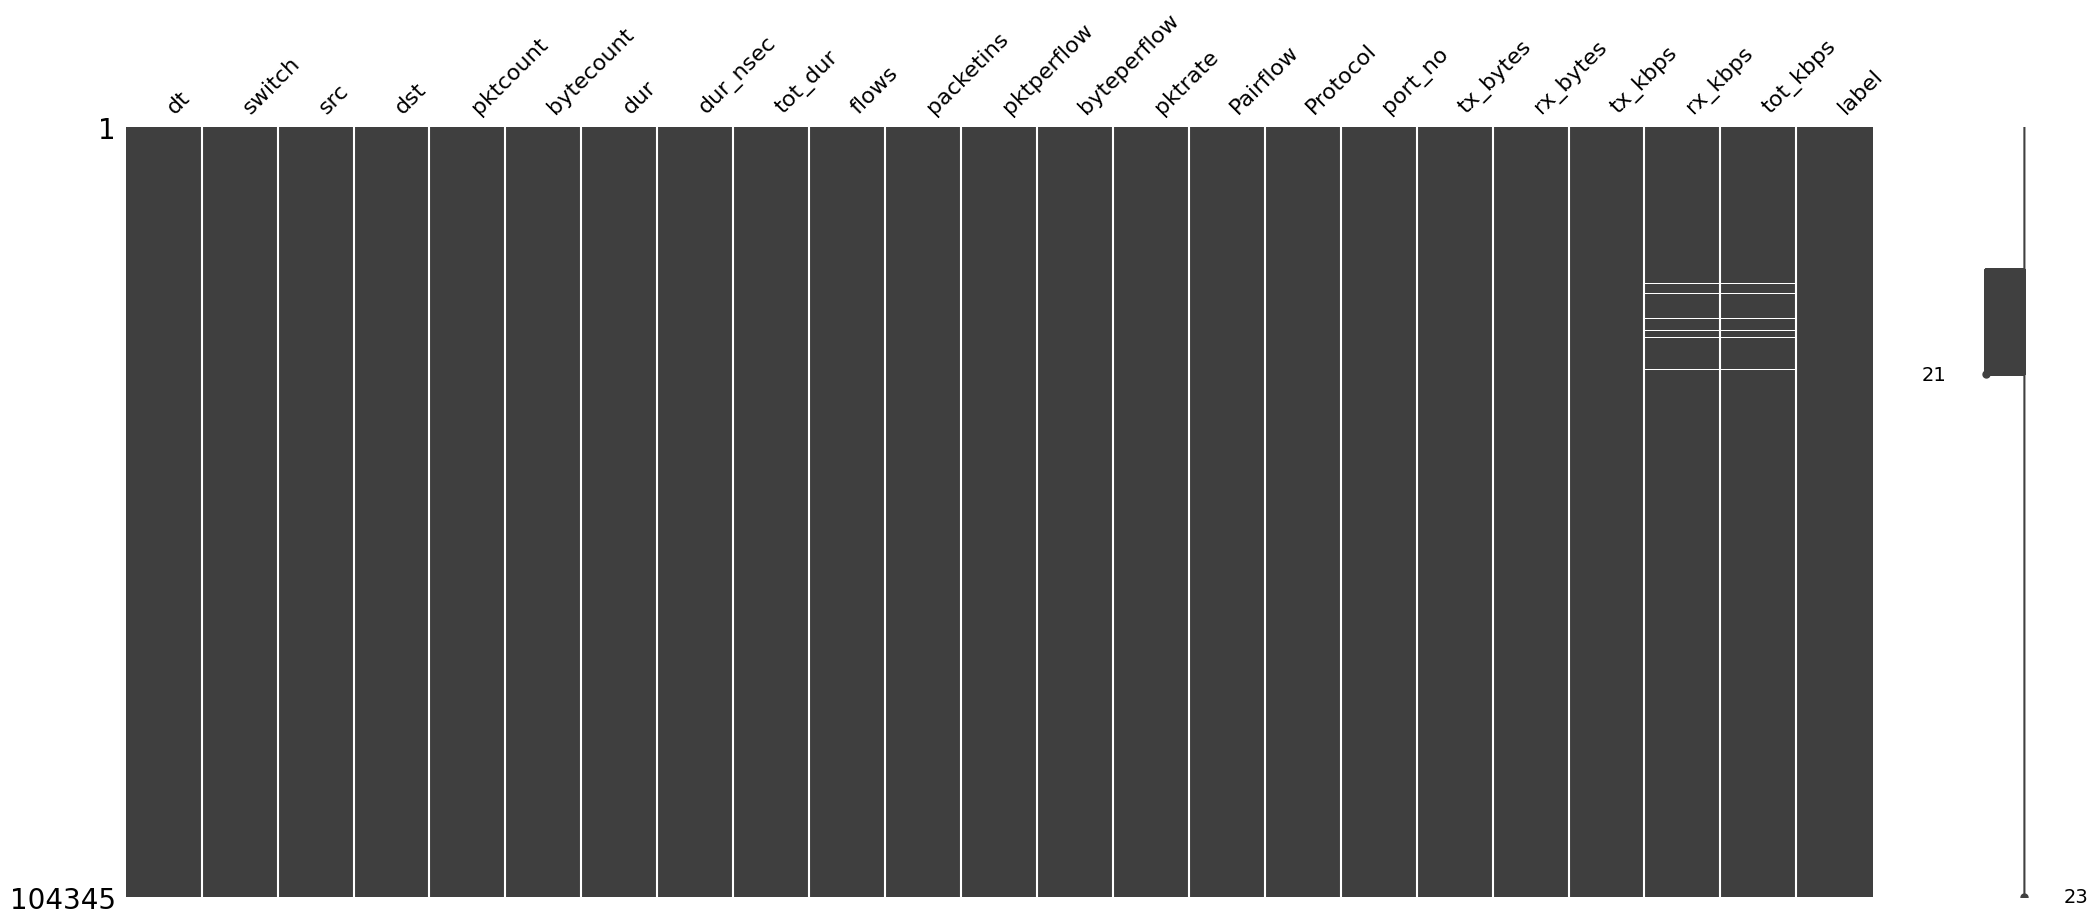

In [7]:
msno.matrix(df)

Count of Null Values in Each Column

In [8]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

Drop rows with Null values

In [9]:
df.dropna(inplace=True)

DataFrame after dropping Null Values

In [10]:
print(df.isnull().sum())
print("Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
Dataframe has 103839 rows and 23 columns after removing null values


# Features in the Dataset
Categorical Features 

In [11]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features are ",len(categorical_features))
print("They are : \n",categorical_features)

The number of categorical features are  3
They are : 
 ['src', 'dst', 'Protocol']


Numerical Features

In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features are ",len(numerical_features))
print("They are : \n",numerical_features)

The number of numerical features are  20
They are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


Number of Unique values in Numerical Features 

In [13]:
df[numerical_features].nunique(axis=0)

dt               858
switch            10
pktcount        9044
bytecount       9270
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64